# **Welcome to the Notebook**

### Let's mount the google drive

In [ ]:
from google.colab import drive

# Use drive.mount() instead of drive._mount()
drive.mount('/content/drive')

Mounted at /content/drive


# Task 1 :
Installing pyspark module

In [ ]:
!pip install pyspark

Importing the modules

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc , col, max , struct
import matplotlib.pyplot as plts

creating spark session

In [ ]:
spark = SparkSession.builder.appName("pyspark_demo").getOrCreate()

# Task 2 :
importing the *Listenings.csv* file:

In [ ]:
listening_path = '/content/drive/MyDrive/Colab Notebooks/dataset/listenings.csv'
listening_df = spark.read.format('csv').option('inferSchema',True) \
                .option('header',True).load(listening_path)

let's check the data:

In [ ]:
listening_df.show()

+-----------+-------------+--------------------+---------------+--------------------+
|    user_id|         date|               track|         artist|               album|
+-----------+-------------+--------------------+---------------+--------------------+
|000Silenced|1299680100000|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|          Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|      Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      

let's delete useless columns:

In [ ]:
listening_df = listening_df.drop('date')

drop the null rows:

In [ ]:
listening_df = listening_df.na.drop()

let's check the dataset again:

In [ ]:
listening_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

let's see the schema:

In [ ]:
listening_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



let's see the shape of our dataframe:

In [ ]:
shape = (listening_df.count(),len(listening_df.columns))
print(shape)

(13758905, 4)


# Task 3:

**Query #0:**
select two columns: track and artist

In [ ]:
q0 = listening_df.select('artist','track')
q0.show()

+---------------+--------------------+
|         artist|               track|
+---------------+--------------------+
|       Jessie J|           Price Tag|
|       Jessie J|Price Tag (Acoust...|
|          Robyn|Be Mine! (Ballad ...|
|          Kelis|            Acapella|
|      The Tease|   I'm Not Invisible|
|       MSTRKRFT|Bounce (Feat NORE...|
|        Rihanna|Don't Stop The Mu...|
|      Meshuggah|               ObZen|
|         Gojira|   Yama's Messengers|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|        In Deference|
|    Decapitated|      Post(?)organic|
|   Dom & Roland|        Mind Feeders|
|Cannibal Corpse|Necrosadistic War...|
|   Dom & Roland|     Dance All Night|
|   Dom & Roland|          Late Night|
|   Dom & Roland|          Freak Seen|
|   Dom & Roland|Paradrenasite (Hi...|
|   Dom & Roland|               Rhino|
+---------------+--------------------+
only showing top 20 rows



**Query #1**:

Let's find all of the records of those users who have listened to ***Rihanna***

In [ ]:
q1= listening_df.select('*').filter(listening_df.artist == 'Rihanna')
q1.show()

+-----------+--------------------+-------+--------------------+
|    user_id|               track| artist|               album|
+-----------+--------------------+-------+--------------------+
|000Silenced|Don't Stop The Mu...|Rihanna|Addicted 2 Bassli...|
|000Silenced|           Disturbia|Rihanna|Good Girl Gone Ba...|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|         Complicated|Rihanna|                Loud|
|00williamsl|What's My Name (f...|Rihanna|                Loud|
|00williamsl|Kanye West feat R...|Rihanna|                Loud|
|    0502008|Only Girl (In the...|Rihanna|                Loud|
|      0rdos|Pon De Replay (Re...|Rihanna|    Music of the Sun|
|      0rdos|          Now I Know|Rihanna|    Music of the Sun|
|      0rdos|There's a Thug in...|Rihanna|    Music of the Sun|
|      0rdos|                Rush|Rihanna|    Music of the Sun|
|      0rdos|              Let Me|Rihann

**Query #2:**

Let's find top 10 users who are fan of ***Rihanna***

In [ ]:
q2 = listening_df.select('user_id').filter(listening_df.artist == 'Rihanna').groupby('user_id').agg(count('user_id').alias('user_count')) \
              .orderBy('user_count')\
              .limit(10)
q2.show()

+---------------+----------+
|        user_id|user_count|
+---------------+----------+
|booksfromboxes_|         1|
|       bikkiboy|         1|
|    abbyquinlan|         1|
|       alexfack|         1|
|      aaronspud|         1|
|  Bambi-strokes|         1|
|      agentgypo|         1|
|         bekari|         1|
| abovethewaves_|         1|
|AbigailVictoria|         1|
+---------------+----------+



**Query #3:**

find top 10 famous tracks

In [ ]:
q3 = listening_df.select('artist','track').groupby('artist','track').agg(count('artist').alias('artist_count')) \
              .orderBy('artist_count')\
              .limit(10)
q3.show()

+--------------------+--------------------+------------+
|              artist|               track|artist_count|
+--------------------+--------------------+------------+
|     The Rudimentals|         Boo Jangles|           1|
|         Blue Stahli|Not Over Til We S...|           1|
|            Amycanbe|                Heal|           1|
|        Dan Benjamin|The Pipeline #26:...|           1|
|       Freshlyground|         Air Hostess|           1|
|      Whitney Avalon|Cinderella vs Bel...|           1|
|          Gene Clark|The American Dreamer|           1|
|              Enigma|Principles of Lus...|           1|
|      Big H & Smack)|Winning (Feat D D...|           1|
|Jay-Z feat Foxy B...|Ain't No Playa (C...|           1|
+--------------------+--------------------+------------+



**Query #4:**

find top 10 famous tracks of ***Rihanna***

In [ ]:
q4 = listening_df.select('artist','track').filter(listening_df.artist == 'Rihanna').groupby('artist','track').agg(count('artist').alias('artist_count')) \
              .orderBy('artist_count') \
              .limit(10)
q4.show()

+-------+--------------------+------------+
| artist|               track|artist_count|
+-------+--------------------+------------+
|Rihanna|Drunk On Love - w...|           1|
|Rihanna|Bitch Better Have...|           1|
|Rihanna|Haunted (Steve Ma...|           1|
|Rihanna|If I Never See Yo...|           1|
|Rihanna|Only Girl (Acoust...|           1|
|Rihanna|Diamonds - Jacob ...|           1|
|Rihanna|Pon de Replay [Fu...|           1|
|Rihanna|If Its Lovin That...|           1|
|Rihanna|    Numb feat Eminem|           1|
|Rihanna|Rihanna feat Drak...|           1|
+-------+--------------------+------------+



**Query #5:**

find top 10 famous albums

In [ ]:
q5 = listening_df.select('artist','album').groupby('artist','album').agg(count('artist').alias('artist_count')) \
              .orderBy('artist_count') \
              .limit(10)
q5.show()

+----------------+--------------------+------------+
|          artist|               album|artist_count|
+----------------+--------------------+------------+
|           Baby!|         Mitch Ryder|           1|
|   Henry Rollins|      Big Ugly Mouth|           1|
|    Oscar D'León| Los Mejores Oscares|           1|
|     Donna Fargo|         Shame On Me|           1|
|  Cobra Starship|#1Nite (One Night...|           1|
|             ak9|                DNCE|           1|
|       The Whigs|Give 'em All a Bi...|           1|
|             DMX|     #MonsterMondays|           1|
|     Jethro Tull|            Nightcap|           1|
|The Decemberists|Uncut 201502 Doin...|           1|
+----------------+--------------------+------------+



# Task 4 :
importing the ***genre.csv*** file:

In [ ]:
genre_path = '/content/drive/MyDrive/Colab Notebooks/dataset/genre.csv'
genre_df = spark.read.format('csv').option('inferSchema',True).option('header',True).load(genre_path)


+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
|        Otis Redding| soul|
|         Marvin Gaye| soul|
|     The Cranberries| rock|
|            Survivor| rock|
|       Fleetwood Mac|blues|
|           Radiohead| rock|
|                Toto| rock|
|                  U2| rock|
|Creedence Clearwa...| rock|
|                 REM| rock|
+--------------------+-----+
only showing top 20 rows



let's check the data

In [ ]:
data = listening_df.join(genre_df,on='artist',how='inner')
data.show()

+------------+-----------+--------------------+--------------------+--------------------+
|      artist|    user_id|               track|               album|               genre|
+------------+-----------+--------------------+--------------------+--------------------+
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Ariana Grande & ...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are|                 pop|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Ariana Grande & ...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag|                 pop|
|       Ro

Let's inner join these two data frames

**Query #6**

find top 10 users who are fan of ***pop*** music

In [ ]:
q6 = data.select('user_id','genre').filter(data.genre == 'pop').groupby('user_id').agg(count('*').alias('count')).orderBy(col('count').desc()).limit(10)
q6.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        01Green|  496|
|      momousagi|  400|
|          mrpsb|  400|
|   BlueKnockOut|  378|
|    musicboy80s|  376|
|  incultojurgis|  374|
| ElektricOrchid|  370|
|foreign_fanatic|  350|
|   Kevin_Soutar|  346|
|  landrover2171|  301|
+---------------+-----+



**Query #7**

find top 10 famous genres

In [ ]:
q7  = data.select('genre').groupby('genre').agg(count('*').alias('count')).orderBy(col('count').desc()).limit(10)
q7.show()

+----------+-------+
|     genre|  count|
+----------+-------+
|      rock|2691934|
|       pop|1544747|
|electronic| 551509|
|   hip hop| 532984|
|      folk| 438174|
|indie rock| 431439|
|      punk| 380915|
|       r&b| 344101|
|     metal| 208107|
|     indie| 206726|
+----------+-------+



# Task 5:
**Query #8**

find out each user favourite genre

In [ ]:
q8_1 = data.select('user_id','genre').groupby('user_id','genre').agg(count('*').alias('count')).orderBy('user_id')
q8_1.show()

+-------+--------------------+-----+
|user_id|               genre|count|
+-------+--------------------+-----+
| --Seph| Boston Pops Orch...|    1|
| --Seph|               Bjorn|    8|
| --Seph|                 pop|    9|
| --Seph| brazilian pop music|    1|
| --Seph|          Nils Frahm|    1|
| --Seph| Snoop Dogg & Dev...|    4|
| --Seph|               dance|    1|
| --Seph|        instrumental|    1|
| --Seph|  progressive trance|    1|
| --Seph|   Vladimir Spivakov|    1|
| --Seph|          Thom Yorke|    2|
| --Seph|               samba|    2|
| --Seph|               Ruben|    4|
| --Seph|             ambient|    6|
| --Seph|           classical|   31|
| --Seph| Sara Mingardo & ...|    1|
| --Seph|               indie|    3|
| --Seph|             baroque|    1|
| --Seph|         heavy metal|    1|
| --Seph|     Hilko Schomerus|    1|
+-------+--------------------+-----+
only showing top 20 rows



In [ ]:
q8_2 = q8_1.groupBy('user_id').agg(max(struct(col('count'),col('genre'))).alias('max')).select('user_id','max.genre')
q8_2.show()

+---------------+-----------+
|        user_id|      genre|
+---------------+-----------+
|      --Shinn--|       rock|
|       --ollz--|       rock|
|     -Amnesiac-|      metal|
|         -Bish-|       rock|
|        -Danni-|       rock|
|          -DeWp|    hip hop|
|      -Faction-|       rock|
|-February-Star-|       rock|
|        -Gemma-|british pop|
|   -Gingergirl-|        pop|
|        -Hazel-|   synthpop|
|        -Heiko-| electronic|
|         -Katie|      lo-fi|
|      -Krystal-|       rock|
|         -Mark-| indie rock|
|       -Mullet-|  metalcore|
|          -Robs|       rock|
| -SleepingStar-|black metal|
|      -Stifler-|       rock|
|  -Toxic-Waste-|  aggrotech|
+---------------+-----------+
only showing top 20 rows



**Query #9**

find out how many pop,rock,metal and hip hop singers we have

and then visulize it using bar chart

In [ ]:
q9 = genre_df.select('genre').filter(genre_df.genre.isin(['pop','rock','metal','hip hop'])).groupBy('genre').agg(count('genre').alias('count')).orderBy('count')
q9.show()

+-------+-----+
|  genre|count|
+-------+-----+
|  metal| 1854|
|hip hop| 4288|
|    pop| 6960|
|   rock| 9066|
+-------+-----+



Now, let's visualize the results using ***matplotlib***

In [ ]:
q9_list = q9.collect()

In [ ]:
labels = [row['genre'] for row in q9_list]
columns = [row['count'] for row in q9_list]

In [ ]:
print(labels)
print(columns)

['metal', 'hip hop', 'pop', 'rock']
[1854, 4288, 6960, 9066]


now lets visualize these two lists using a bar chart

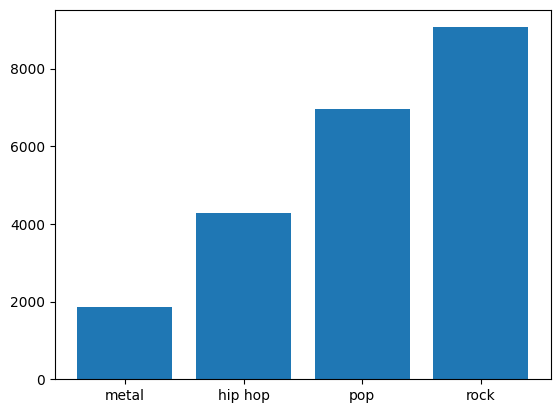

In [ ]:
plts.bar(labels,columns)
plts.show()